# Data Cleaning

1. **Juntar tablas**: si queremos obtener relaciones entre variables o graficar datos de diferentes fuentes, tendremos que unirlos en una única tabla mediante sentencias como merge o join.
2. **Eliminar columnas**: columnas que no sirvan para el análisis, identificadores, constantes, columnas a null.
3. **Formato de los datos**: tras una primera eliminación de columnas, hay que forzar los tipos de los datos a lo que deberían ser. Asegúrate que un string es un string, que un date es un date y un numérico está en el formato que deseamos, de lo contrario tendremos errores en el posterior tratamiento.
3. **Missings**: analiza los valores missings de las variables e investig por qué tienes nulls. En Machine Learning se suelen sustituir por medias o modas pero en Data Analysis resulta interesante analizar por qué hay missings en algunos registros.
4. **Outliers**: al igual que con los missings, los outliers suelen meter ruido innecesario en los modelos, y distorsiona su entrenamiento con datos que no son representativos de la muestra, por lo que se suelen eliminar. En el caso de Data Analysis no es necesario, sino que resulta interesante destacar outliers y por qué de los mismos.¿Cómo detectar outliers?

    14.1 Histogramas
    
    14.2 Diagramas de caja
    
    14.3 Scatter plots
    
    14.4 Cuartiles, rango, mínimo y máximo
    
5. **Duplicados**: elimina los registros duplicados.
6. **Escalado**: si queremos comparar variables con distintas escalas, tendremos que transformarlas a la misma mediante un MinMaxScaler.
7. **Transformaciones**: sacar nuevas variables a partir de las anteriores, mediante ratios numéricos, binning, datos de las fechas (año, dia, mes).

In [154]:
import pandas as np

In [155]:
import pandas as pd
data = pd.read_csv("data/coches-de-segunda-mano-sample.csv")

In [156]:
data.head(20)

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,e158ae0ca53119ca199c28c36b5c2fcd,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,...,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:13,2021-01-15 00:00:00
1,ff267ebb7e700246f47f84f3db660b4b,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,...,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,Spain,2021-01-02 11:25:40,2021-01-15 00:00:00
2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,...,4,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00
3,0449972a4d07594acf92e9a7dd28b39c,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,...,4,Manual,Blanco,9,True,Inniauto,Navarra,Spain,2020-11-25 11:09:14,2021-01-15 00:00:00
4,12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,...,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain,2021-01-12 20:00:34,2021-01-15 00:00:00
5,f15e9a256de698bf0588753e7add0fdf,9881bcdd5a0ad4733037b3fb25e69c3a,PEUGEOT,3008,PEUGEOT 3008 Style 1.2 PureTech 130 SS 5p.,11490,10490.0,Gasolina,2016.0,78665,...,5,Manual,Blanco,32,True,Flexicar Rivas,Madrid,Spain,2021-01-08 17:03:33,2021-01-15 00:00:00
6,517b8f7c488d9d4645f76b1611418a4e,9881bcdd5a0ad4733037b3fb25e69c3a,LAND-ROVER,Discovery Sport,LAND-ROVER Discovery Sport 2.0L TD4 110kW 150C...,28500,26220.0,Diésel,2017.0,36238,...,5,Automático,Blanco,47,True,OK Cars,Baleares,Spain,2021-01-12 11:26:18,2021-01-15 00:00:00
7,2ad681959d278f32a83c3ad7be35443e,9881bcdd5a0ad4733037b3fb25e69c3a,HONDA,Civic,HONDA Civic 2.2 iDTEC Sport 5p.,8200,NaN,Diésel,2012.0,203000,...,5,Manual,Blanco,15,False,001783c2b59526bb858210edffa68c6b,Barcelona,Spain,2020-12-03 15:35:56,2021-01-15 00:00:00
8,3cb810cd0cd871eb6d5c38832f5f8beb,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,Berlingo,CITROEN Berlingo Multispace 20 Aniv. PureTech ...,12100,NaN,Gasolina,2018.0,45000,...,5,Manual,Azul,6,False,f7cb72400bd7fb19294e1f9692c48cd9,Alicante,Spain,2020-11-06 17:57:55,2021-01-15 00:00:00
9,13b881bdd31a0387edd64edd726e8c93,9881bcdd5a0ad4733037b3fb25e69c3a,NISSAN,NOTE,NISSAN NOTE 5p. 1.2G 80CV Acenta NissanConnect...,6300,NaN,Gasolina,2016.0,77000,...,5,Manual,Blanco,6,False,8a3b0eb4d055a275274895319688e80a,Barcelona,Spain,2020-12-14 17:39:46,2021-01-15 00:00:00


* Cambiar formato de strings columnas

In [157]:
data.columns = data.columns.str.capitalize()
data.columns


Index(['Url', 'Company', 'Make', 'Model', 'Version', 'Price', 'Price_financed',
       'Fuel', 'Year', 'Kms', 'Power', 'Doors', 'Shift', 'Color', 'Photos',
       'Is_professional', 'Dealer', 'Province', 'Country', 'Publish_date',
       'Insert_date'],
      dtype='object')

In [158]:
data.columns = data.columns.str.replace("_", " ")
data.columns

Index(['Url', 'Company', 'Make', 'Model', 'Version', 'Price', 'Price financed',
       'Fuel', 'Year', 'Kms', 'Power', 'Doors', 'Shift', 'Color', 'Photos',
       'Is professional', 'Dealer', 'Province', 'Country', 'Publish date',
       'Insert date'],
      dtype='object')

2. **Eliminar columnas**: columnas que no sirvan para el análisis, identificadores, constantes, columnas a null.

* Elimanar columnas

In [159]:
data.drop(columns = ["Url", "Company", "Version", "Price financed", "Color", "Photos" ,'Insert date', "Country"], inplace= True)
data.head()

,Make,Model,Price,Fuel,Year,Kms,Power,Doors,Shift,Is professional,Dealer,Province,Publish date
0,SEAT,Toledo,950,Diésel,2000.0,227000,NaN,4,Manual,False,0f4bb8455d27349b8273109b66a847f3,Navarra,2020-12-18 10:47:13
1,CITROEN,C1,6200,Gasolina,2017.0,50071,82.0,5,Manual,True,Autos Raymara,Tenerife,2021-01-02 11:25:40
2,FORD,Transit Connect,7851,Diésel,2016.0,103000,100.0,4,Manual,True,Auto 96,Barcelona,2020-12-16 10:51:45
3,VOLKSWAGEN,Caravelle,19426,Diésel,2014.0,120000,140.0,4,Manual,True,Inniauto,Navarra,2020-11-25 11:09:14
4,FORD,Transit,22850,Diésel,2017.0,107000,130.0,2,Manual,True,"Autofleet España,s.l",Sevilla,2021-01-12 20:00:34


* Borrar o Rellenar los NaN 

In [160]:
data.head()

,Make,Model,Price,Fuel,Year,Kms,Power,Doors,Shift,Is professional,Dealer,Province,Publish date
0,SEAT,Toledo,950,Diésel,2000.0,227000,NaN,4,Manual,False,0f4bb8455d27349b8273109b66a847f3,Navarra,2020-12-18 10:47:13
1,CITROEN,C1,6200,Gasolina,2017.0,50071,82.0,5,Manual,True,Autos Raymara,Tenerife,2021-01-02 11:25:40
2,FORD,Transit Connect,7851,Diésel,2016.0,103000,100.0,4,Manual,True,Auto 96,Barcelona,2020-12-16 10:51:45
3,VOLKSWAGEN,Caravelle,19426,Diésel,2014.0,120000,140.0,4,Manual,True,Inniauto,Navarra,2020-11-25 11:09:14
4,FORD,Transit,22850,Diésel,2017.0,107000,130.0,2,Manual,True,"Autofleet España,s.l",Sevilla,2021-01-12 20:00:34


2. Borramos filas donde haya al menos un NaN. 

In [161]:
data.dropna(how = "any", inplace=True)

In [162]:
data.head()

,Make,Model,Price,Fuel,Year,Kms,Power,Doors,Shift,Is professional,Dealer,Province,Publish date
1,CITROEN,C1,6200,Gasolina,2017.0,50071,82.0,5,Manual,True,Autos Raymara,Tenerife,2021-01-02 11:25:40
2,FORD,Transit Connect,7851,Diésel,2016.0,103000,100.0,4,Manual,True,Auto 96,Barcelona,2020-12-16 10:51:45
3,VOLKSWAGEN,Caravelle,19426,Diésel,2014.0,120000,140.0,4,Manual,True,Inniauto,Navarra,2020-11-25 11:09:14
4,FORD,Transit,22850,Diésel,2017.0,107000,130.0,2,Manual,True,"Autofleet España,s.l",Sevilla,2021-01-12 20:00:34
5,PEUGEOT,3008,11490,Gasolina,2016.0,78665,130.0,5,Manual,True,Flexicar Rivas,Madrid,2021-01-08 17:03:33


* Compruebo que no hay nulos

In [163]:
data.isnull().sum()


Make               0
Model              0
Price              0
Fuel               0
Year               0
Kms                0
Power              0
Doors              0
Shift              0
Is professional    0
Dealer             0
Province           0
Publish date       0
dtype: int64

3. **Formato de los datos**: tras una primera eliminación de columnas, hay que forzar los tipos de los datos a lo que deberían ser. Asegúrate que un string es un string, que un date es un date y un numérico está en el formato que deseamos, de lo contrario tendremos errores en el posterior tratamiento.

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41348 entries, 1 to 49999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Make             41348 non-null  object 
 1   Model            41348 non-null  object 
 2   Price            41348 non-null  int64  
 3   Fuel             41348 non-null  object 
 4   Year             41348 non-null  float64
 5   Kms              41348 non-null  int64  
 6   Power            41348 non-null  float64
 7   Doors            41348 non-null  int64  
 8   Shift            41348 non-null  object 
 9   Is professional  41348 non-null  bool   
 10  Dealer           41348 non-null  object 
 11  Province         41348 non-null  object 
 12  Publish date     41348 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(7)
memory usage: 4.1+ MB


In [165]:
data["Price"] = data["Price"].astype(float)
data["Year"] = data["Year"].astype(int)
data["Kms"] = data["Kms"].astype(float)
data['Publish date'] = pd.to_datetime(data['Publish date'])



In [166]:
data.head(20)

,Make,Model,Price,Fuel,Year,Kms,Power,Doors,Shift,Is professional,Dealer,Province,Publish date
1,CITROEN,C1,6200.0,Gasolina,2017,50071.0,82.0,5,Manual,True,Autos Raymara,Tenerife,2021-01-02 11:25:40
2,FORD,Transit Connect,7851.0,Diésel,2016,103000.0,100.0,4,Manual,True,Auto 96,Barcelona,2020-12-16 10:51:45
3,VOLKSWAGEN,Caravelle,19426.0,Diésel,2014,120000.0,140.0,4,Manual,True,Inniauto,Navarra,2020-11-25 11:09:14
4,FORD,Transit,22850.0,Diésel,2017,107000.0,130.0,2,Manual,True,"Autofleet España,s.l",Sevilla,2021-01-12 20:00:34
5,PEUGEOT,3008,11490.0,Gasolina,2016,78665.0,130.0,5,Manual,True,Flexicar Rivas,Madrid,2021-01-08 17:03:33
6,LAND-ROVER,Discovery Sport,28500.0,Diésel,2017,36238.0,150.0,5,Automático,True,OK Cars,Baleares,2021-01-12 11:26:18
7,HONDA,Civic,8200.0,Diésel,2012,203000.0,150.0,5,Manual,False,001783c2b59526bb858210edffa68c6b,Barcelona,2020-12-03 15:35:56
8,CITROEN,Berlingo,12100.0,Gasolina,2018,45000.0,110.0,5,Manual,False,f7cb72400bd7fb19294e1f9692c48cd9,Alicante,2020-11-06 17:57:55
9,NISSAN,NOTE,6300.0,Gasolina,2016,77000.0,80.0,5,Manual,False,8a3b0eb4d055a275274895319688e80a,Barcelona,2020-12-14 17:39:46
10,CITROEN,Berlingo,13900.0,Diésel,2017,81000.0,100.0,5,Manual,True,Automóviles Emilio,Murcia,2021-01-07 19:22:08


* Renombrar Columna "Is profesional" y cambiar True a Professional y False a Particular

In [167]:
data.rename(columns = {"Is professional" : "Type of retailer"}, inplace = True)

In [168]:
data['Type of retailer'] = data['Type of retailer'].replace({True: 'Professional', False: 'Particular'})

In [169]:
data.head()

,Make,Model,Price,Fuel,Year,Kms,Power,Doors,Shift,Type of retailer,Dealer,Province,Publish date
1,CITROEN,C1,6200.0,Gasolina,2017,50071.0,82.0,5,Manual,Professional,Autos Raymara,Tenerife,2021-01-02 11:25:40
2,FORD,Transit Connect,7851.0,Diésel,2016,103000.0,100.0,4,Manual,Professional,Auto 96,Barcelona,2020-12-16 10:51:45
3,VOLKSWAGEN,Caravelle,19426.0,Diésel,2014,120000.0,140.0,4,Manual,Professional,Inniauto,Navarra,2020-11-25 11:09:14
4,FORD,Transit,22850.0,Diésel,2017,107000.0,130.0,2,Manual,Professional,"Autofleet España,s.l",Sevilla,2021-01-12 20:00:34
5,PEUGEOT,3008,11490.0,Gasolina,2016,78665.0,130.0,5,Manual,Professional,Flexicar Rivas,Madrid,2021-01-08 17:03:33


In [170]:
data["Type of retailer"].value_counts()

Type of retailer
Professional    32348
Particular       9000
Name: count, dtype: int64

* Renombrar columna "Publish date" y quedarse solo con el año de publicación

In [171]:
data['Publish date'] = data['Publish date'].dt.strftime('%Y')

In [172]:
data.rename(columns = {"Publish date": "Publication year"}, inplace = True)

In [173]:
data["Publication year"].value_counts()

Publication year
2021    21053
2020    20288
2019        4
2017        2
2018        1
Name: count, dtype: int64

* Renombrar columna "Make"

In [174]:
data.rename(columns = {"Make": "Car brand"}, inplace = True)

* Función empleada para modificar el identificador de particulares en la columna de Dealer

In [175]:
def replace_dealer(dealer_value):
    if len(dealer_value) == 32:  
        return 'Particular'
    else:
        return dealer_value


data['Dealer'] = data['Dealer'].apply(replace_dealer)

In [176]:
data

,Car brand,Model,Price,Fuel,Year,Kms,Power,Doors,Shift,Type of retailer,Dealer,Province,Publication year
1,CITROEN,C1,6200.0,Gasolina,2017,50071.0,82.0,5,Manual,Professional,Autos Raymara,Tenerife,2021
2,FORD,Transit Connect,7851.0,Diésel,2016,103000.0,100.0,4,Manual,Professional,Auto 96,Barcelona,2020
3,VOLKSWAGEN,Caravelle,19426.0,Diésel,2014,120000.0,140.0,4,Manual,Professional,Inniauto,Navarra,2020
4,FORD,Transit,22850.0,Diésel,2017,107000.0,130.0,2,Manual,Professional,"Autofleet España,s.l",Sevilla,2021
5,PEUGEOT,3008,11490.0,Gasolina,2016,78665.0,130.0,5,Manual,Professional,Flexicar Rivas,Madrid,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,HYUNDAI,i30,18490.0,Gasolina,2018,47000.0,140.0,5,Automático,Professional,Flexicar Málaga,Málaga,2020
49996,RENAULT,Laguna,14500.0,Diésel,2015,68750.0,150.0,2,Manual,Professional,Ocasion Plus,Málaga,2021
49997,PEUGEOT,108,11000.0,Gasolina,2019,21422.0,72.0,5,Manual,Professional,Psa Retail Huelva,Huelva,2021
49998,AUDI,RS4,47900.0,Gasolina,2013,47900.0,450.0,5,Automático,Professional,Codigocar Lugo,Lugo,2021


* Outliers

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [178]:
sns.set_style("darkgrid")

* Histograma

In [179]:
price = data["Price"].sort_values(ascending=False)



Text(0.5, 0, 'Precio (€)')

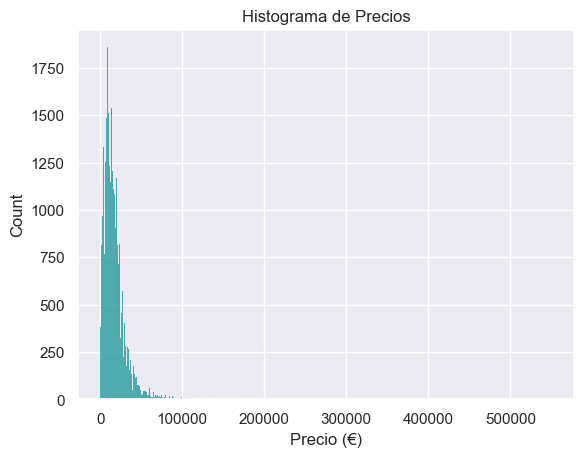

In [180]:
plt.figure()
sns.histplot(price, color = "darkcyan")
plt.title('Histograma de Precios')
plt.xlabel('Precio (€)')



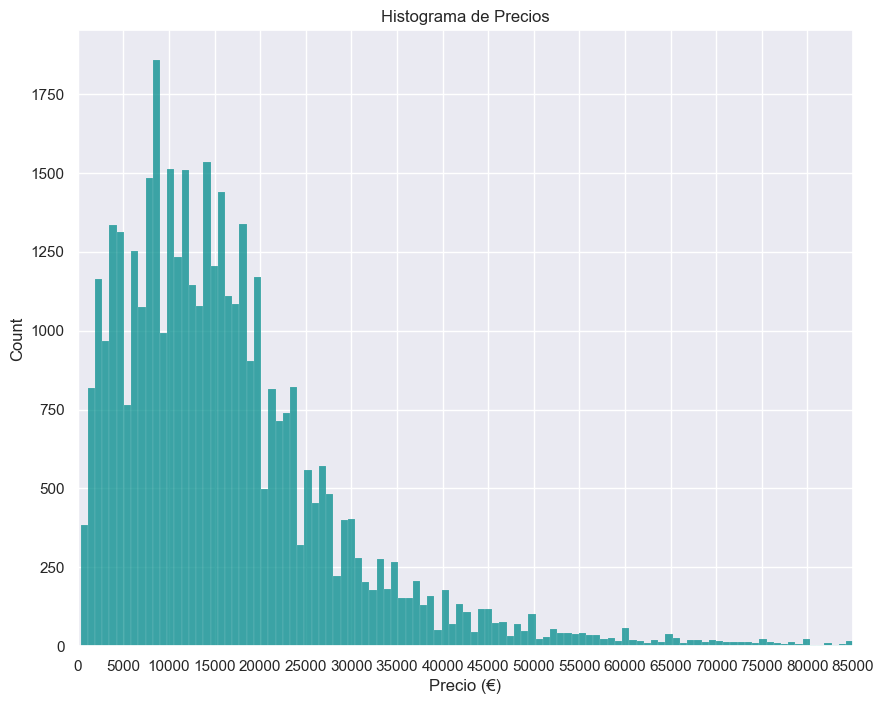

In [181]:
plt.figure(figsize=(10,8))
sns.histplot(price, color = "darkcyan")
plt.title('Histograma de Precios')
plt.xlabel('Precio (€)')
plt.xlim(0, 80000)

plt.xticks(np.arange(0,90000,5000));

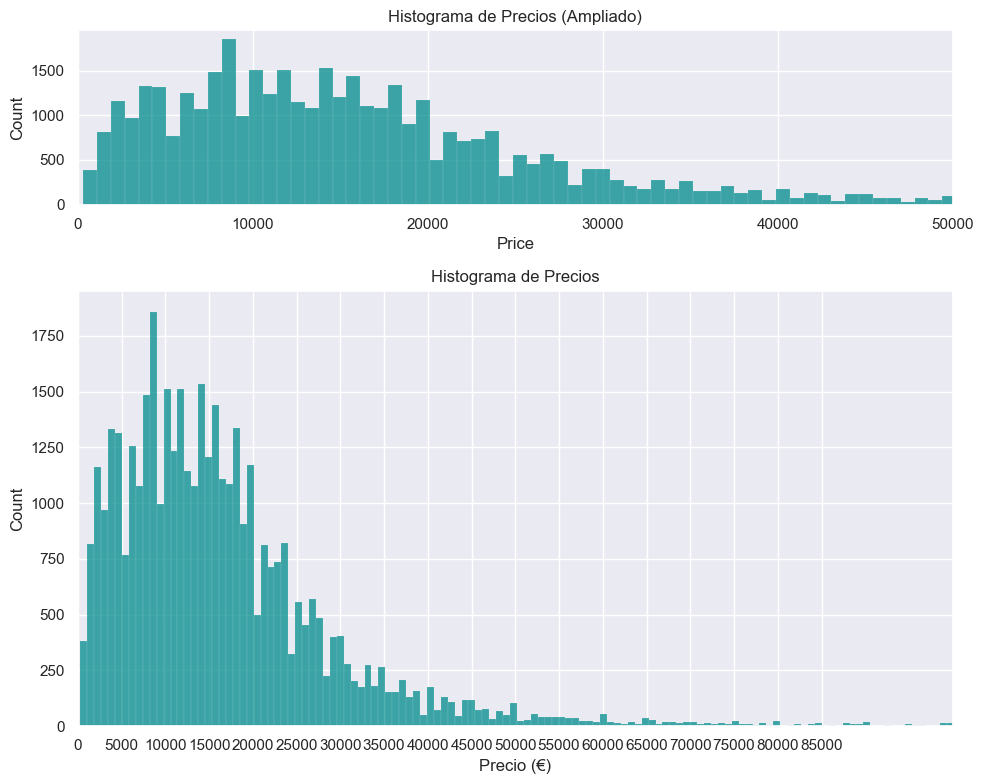

In [182]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [2, 5]})

sns.histplot(price, color="darkcyan", ax=axs[1])
axs[1].set_title('Histograma de Precios')
axs[1].set_xlabel('Precio (€)')
axs[1].set_xlim(0, 100000)
axs[1].set_xticks(np.arange(0, 90000, 5000))


sns.histplot(price, color="darkcyan", ax=axs[0])
axs[0].set_title('Histograma de Precios (Ampliado)')
axs[0].set_xlim(0, 50000) 

plt.tight_layout()

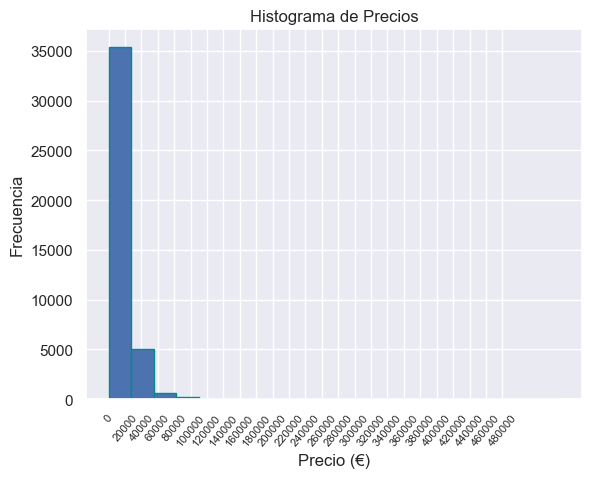

In [183]:

data['Price'].plot.hist(bins=20, edgecolor="darkcyan")
plt.title('Histograma de Precios')
plt.xlabel('Precio (€)')
plt.xticks(np.arange(0,500000,20000))
plt.xticks(rotation=50, fontsize=8)
plt.ylabel('Frecuencia');


* Diagrama de caja

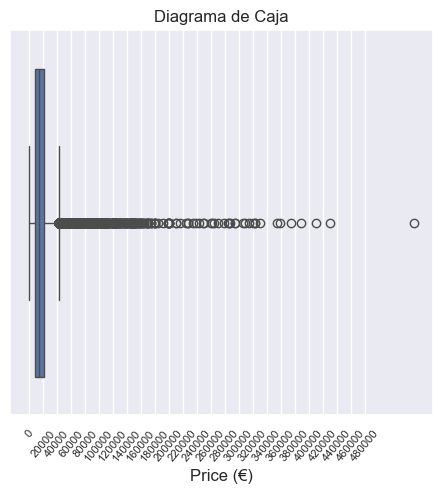

In [184]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
sns.boxplot(x=data['Price'], orient='h')
plt.xlabel("Price (€)")
plt.title("Diagrama de Caja")
plt.xticks(np.arange(0,500000,20000))
plt.xticks(rotation=50, fontsize=8);


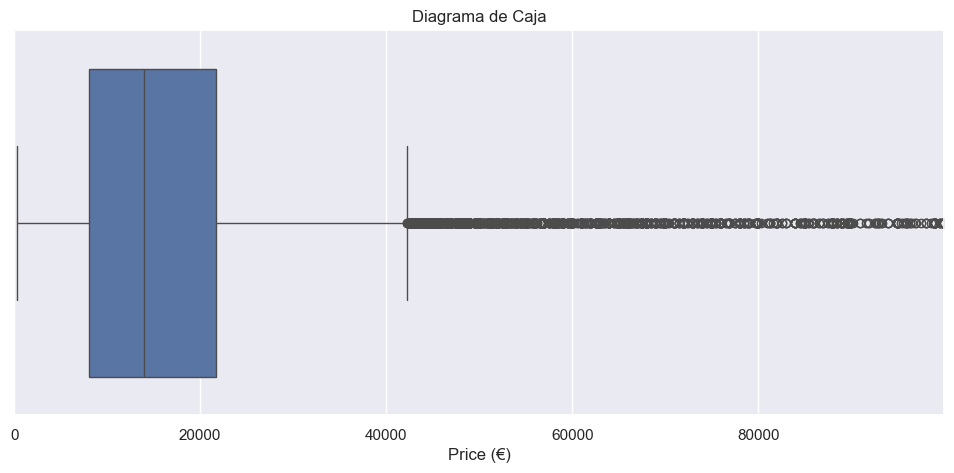

In [185]:
# Gráficas
plt.figure(figsize=(12, 5))

sns.boxplot(x=data['Price'], orient='h')
plt.xlabel("Price (€)")
plt.title("Diagrama de Caja")
plt.xlim(0,100000)
plt.xticks(np.arange(0,100000,20000));


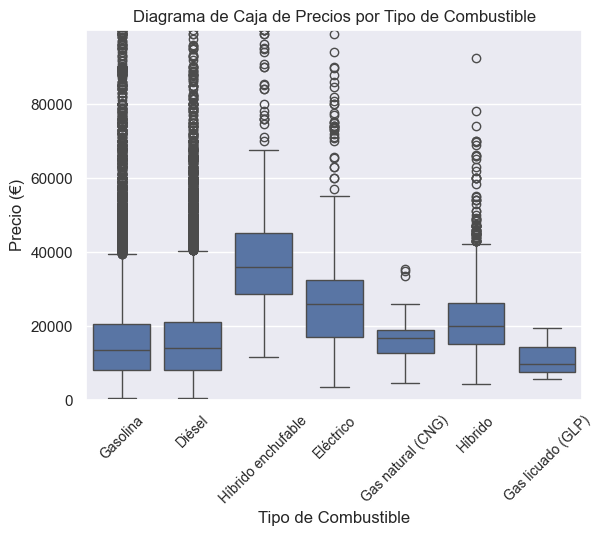

In [186]:
plt.figure()
sns.boxplot(x='Fuel', y='Price', data=data)
plt.title('Diagrama de Caja de Precios por Tipo de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio (€)')
plt.ylim(0,100000)
plt.yticks(np.arange(0,100000,20000))
plt.xticks(rotation=45, fontsize=10);


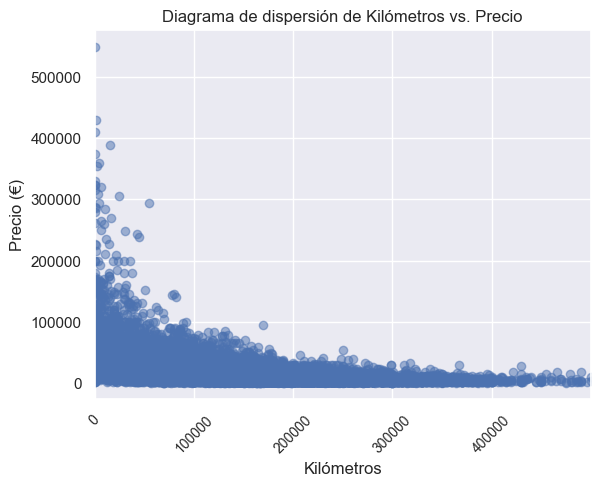

In [187]:
plt.figure()
plt.scatter(data['Kms'], data['Price'], alpha=0.5)
plt.title('Diagrama de dispersión de Kilómetros vs. Precio')
plt.xlabel('Kilómetros')
plt.ylabel('Precio (€)')
plt.xlim(0,500000)
plt.xticks(np.arange(0,500000, 100000))
plt.xticks(rotation=45, fontsize=10);



* Cuartiles, Rango, Mínimo y Máximo

In [188]:
cuartiles = data['Price'].quantile([0.25, 0.5, 0.75])
rango = data['Price'].max() - data['Price'].min()
minimo = data['Price'].min()
maximo = data['Price'].max()

print('Cuartiles:')
print(cuartiles)
print('Rango:', rango)
print('Mínimo:', minimo)
print('Máximo:', maximo)

Cuartiles:
0.25     7999.0
0.50    13999.0
0.75    21700.0
Name: Price, dtype: float64
Rango: 549600.0
Mínimo: 300.0
Máximo: 549900.0


In [189]:
media = data['Price'].mean()
mediana = data['Price'].median()
moda = data['Price'].mode().iloc[0]

varianza = data['Price'].var()
desviacion_estandar = data['Price'].std()


In [190]:
estadisticas = {
    'Cuartil 1 (Q1)': cuartiles[0.25],
    'Mediana': mediana,
    'Cuartil 3 (Q3)': cuartiles[0.75],
    'Rango': rango,
    'Mínimo': minimo,
    'Máximo': maximo,
    'Media': media,
    'Moda': moda,
    'Varianza': varianza,
    'Desviación Estándar': desviacion_estandar}

df_estadisticas = pd.DataFrame(estadisticas, index=[0])




In [191]:
df_estadisticas

,Cuartil 1 (Q1),Mediana,Cuartil 3 (Q3),Rango,Mínimo,Máximo,Media,Moda,Varianza,Desviación Estándar
0,7999.0,13999.0,21700.0,549600.0,300.0,549900.0,17372.462997,17900.0,2.945546e+08,17162.592503


In [192]:
df_estadisticas.to_csv("data/df_estadisticas.csv" )

Text(0.5, 1.0, 'Histograma')

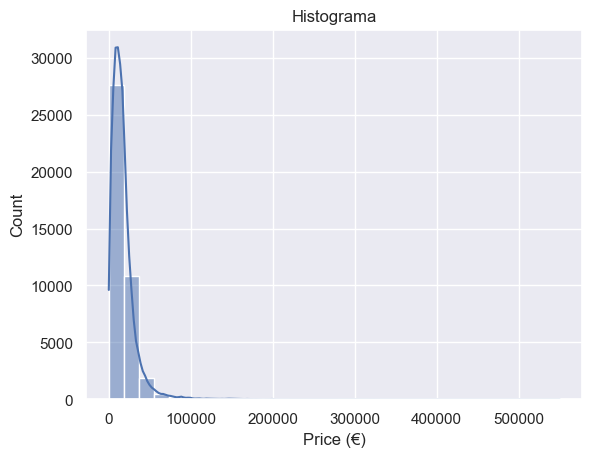

In [193]:

plt.figure()
sns.histplot(data['Price'], bins=30, kde=True)
plt.xlabel("Price (€)")
plt.title("Histograma")

**Análisis univariante**: en este apartado se pretende describir la variable mediante diferentes estadísticos, así como graficando su función de distribución para ver la forma, asimetría, centralidad y dispersión de la misma.

    18.1 Estadísticos de centralidad: media, mediana, moda, cuartiles y percentiles
    
    18.2 Estadísticos de dispersión: varianza, desviación estándar, rango, mínimo y máximo
    
    18.2 Gráficas: Tablas de frecuencias, histogramas, función densidad de probabilidad, diagrama de caja, diagrama de barras, violin plot, swarm plot.       

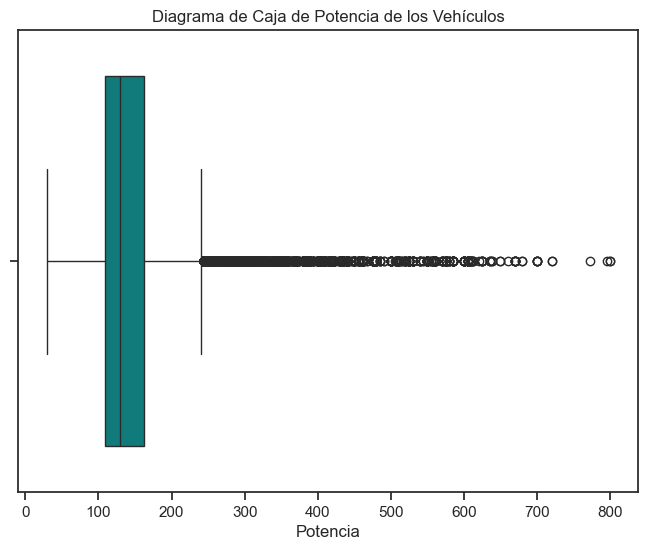

In [235]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Power'], color= "darkcyan")
plt.title("Diagrama de Caja de Potencia de los Vehículos")
plt.xlabel("Potencia");


In [236]:
coches_count = data['Car brand'].value_counts()

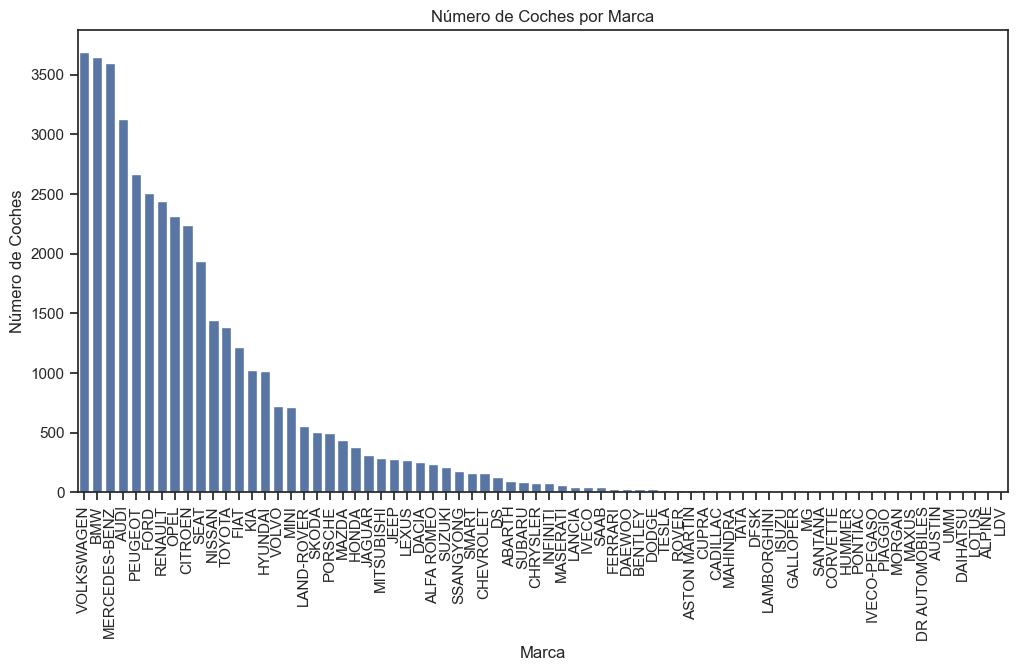

In [237]:
plt.figure(figsize=(12, 6))
sns.barplot(x=coches_count.index, y=coches_count.values)
plt.title("Número de Coches por Marca")
plt.xlabel("Marca")
plt.ylabel("Número de Coches")
plt.xticks(rotation=90);


**Análisis bivariante**: una vez comprendidas las variables por separado, tendremos que empezar a ver relaciones entre las mismas.

    19.1 Agrupados: agrupar por un campo categórico y calcular estadísticos como el conteo, la media, suma...
    19.2 Gráficas: summary tables (describe de pandas), scatter plots, diagrama de barras, cross table o binning

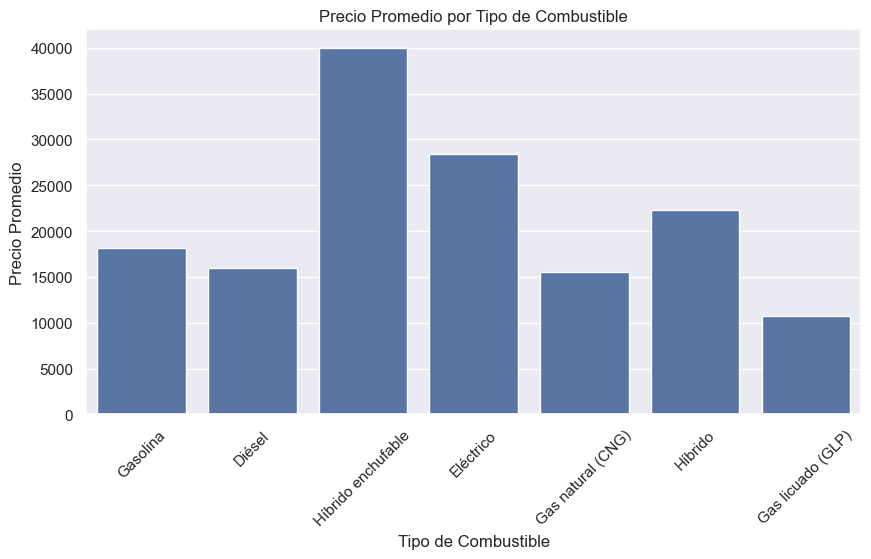

In [196]:
fuel_price_stats = data.groupby('Fuel')['Price'].agg(['count', 'mean', 'sum'])

plt.figure(figsize=(10, 5))
sns.barplot(x='Fuel', y='Price', data=data, errorbar=None)
plt.xlabel("Tipo de Combustible")
plt.ylabel("Precio Promedio")
plt.title("Precio Promedio por Tipo de Combustible")
plt.xticks(rotation=45)
plt.show()

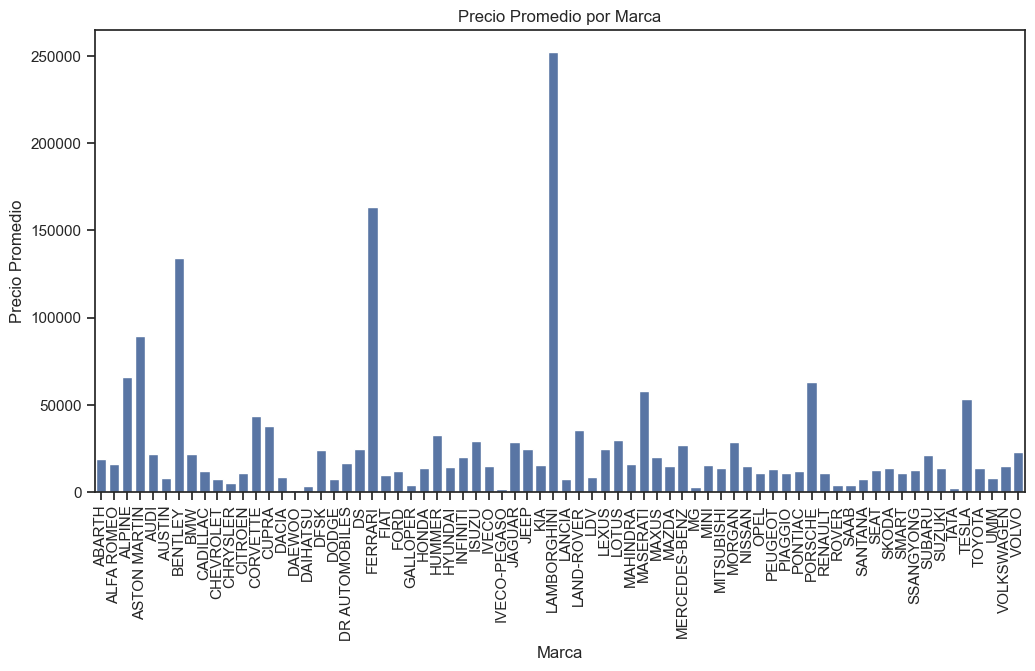

In [238]:
grupo_marca = data.groupby('Car brand')['Price'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x="Car brand", y="Price", data=grupo_marca)
plt.title("Precio Promedio por Marca")
plt.xlabel("Marca")
plt.ylabel("Precio Promedio")
plt.xticks(rotation=90);


In [242]:
tabla_cruzada = pd.crosstab(data['Car brand'], data['Fuel'])
tabla_cruzada

Fuel,Diésel,Eléctrico,Gas licuado (GLP),Gas natural (CNG),Gasolina,Híbrido,Híbrido enchufable
Car brand,,,,,,,
ABARTH,0,0,0,0,96,0,0
ALFA ROMEO,172,0,0,0,69,0,0
ALPINE,0,0,0,0,1,0,0
ASTON MARTIN,0,0,0,0,15,0,0
AUDI,2238,7,0,8,847,0,32
...,...,...,...,...,...,...,...
TESLA,0,23,0,0,0,0,0
TOYOTA,454,3,0,0,358,568,0
UMM,1,0,0,0,0,0,0


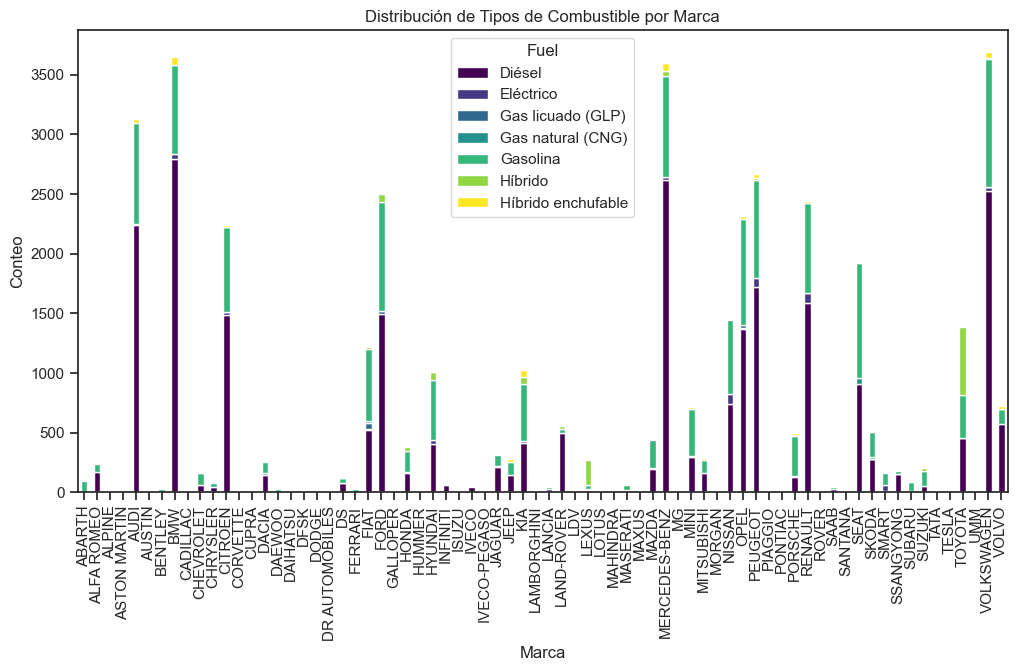

In [243]:

tabla_cruzada.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='viridis')

plt.title("Distribución de Tipos de Combustible por Marca")
plt.xlabel("Marca")
plt.ylabel("Conteo")
plt.xticks(rotation=90);

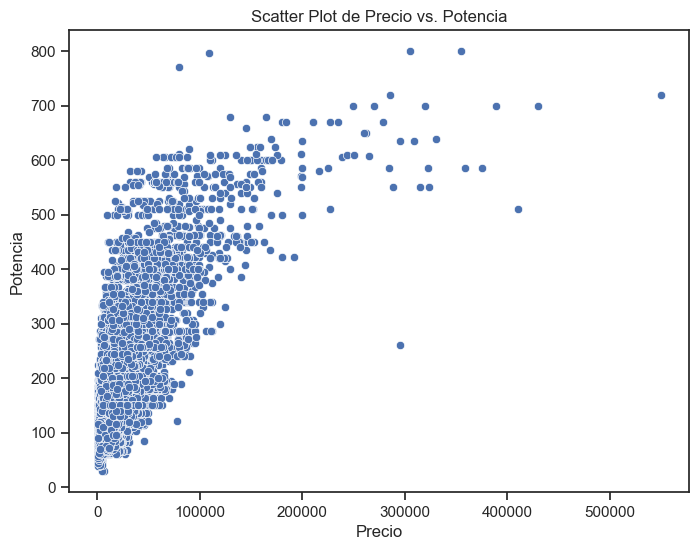

In [248]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Price", y="Power", data=data)
plt.title("Scatter Plot de Precio vs. Potencia")
plt.xlabel("Precio")
plt.ylabel("Potencia");


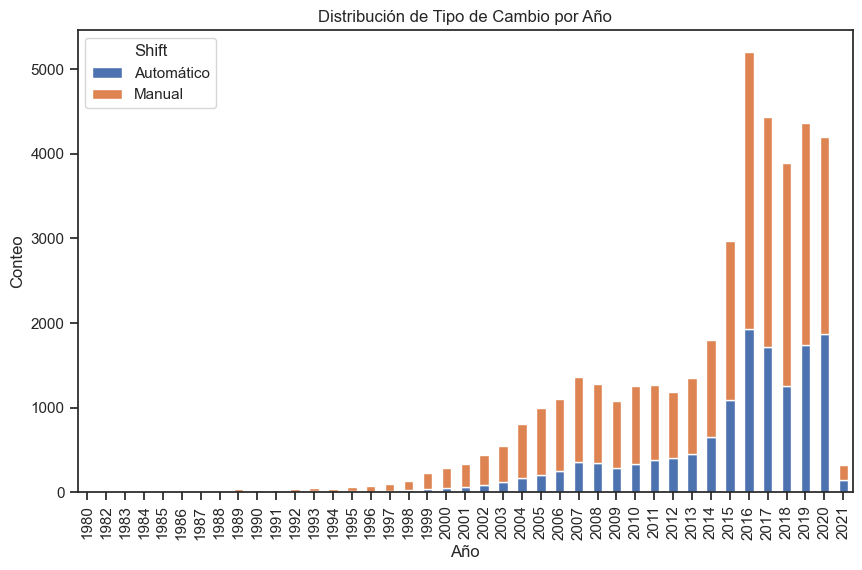

In [247]:

tabla_cambios_por_año = pd.crosstab(data['Year'], data['Shift'])
tabla_cambios_por_año.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribución de Tipo de Cambio por Año")
plt.xlabel("Año")
plt.ylabel("Conteo");


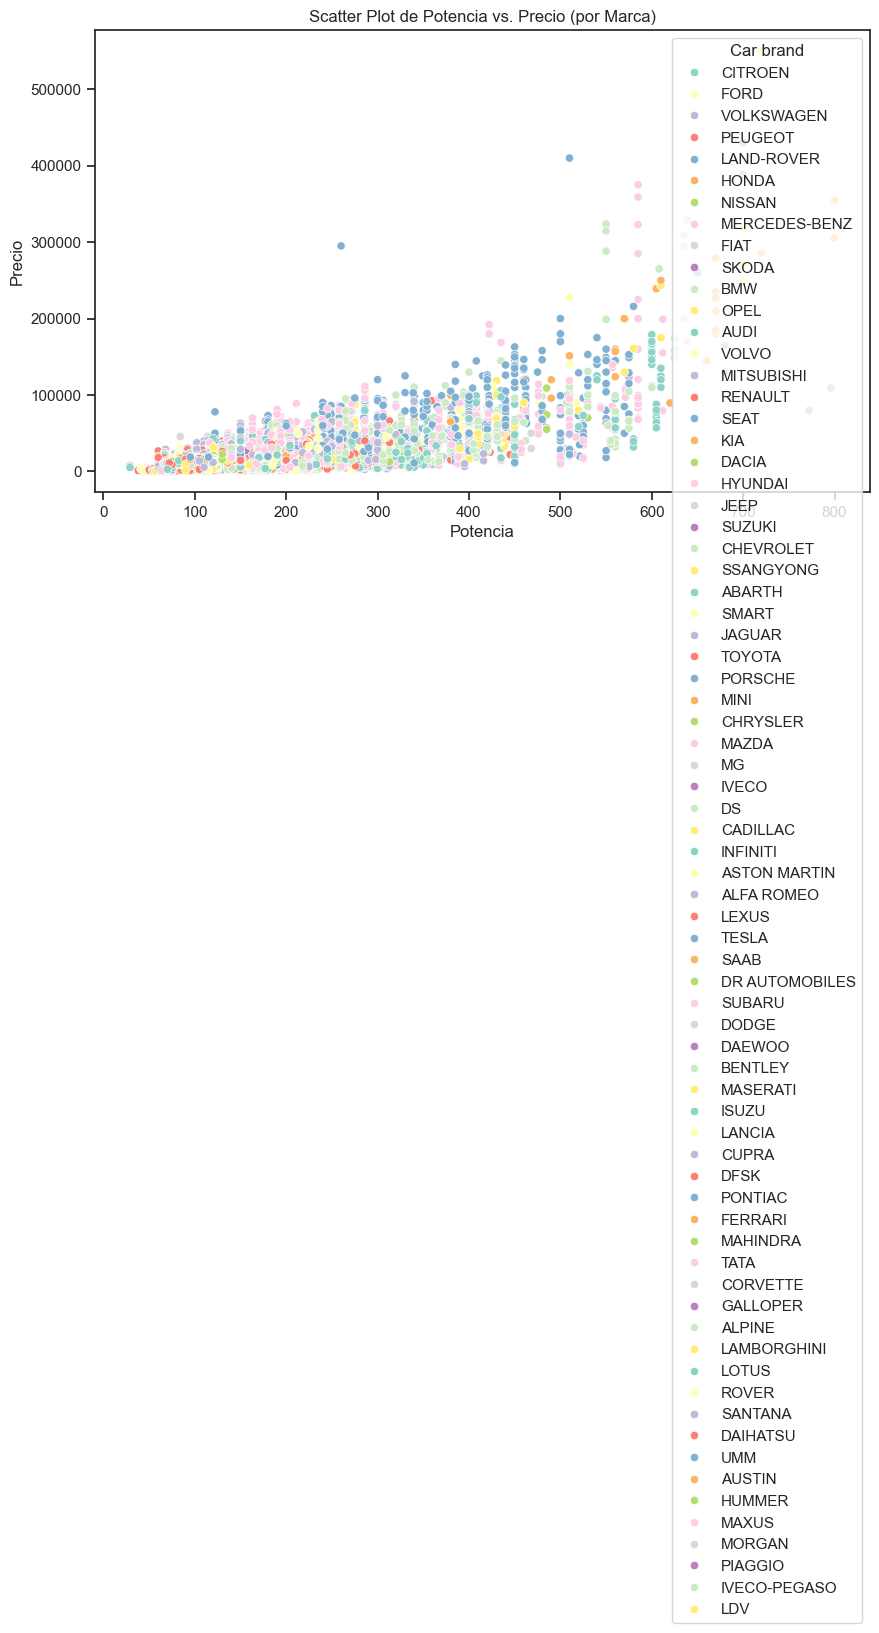

In [253]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Power", y="Price", hue="Car brand", data=data, palette="Set3")
plt.title("Scatter Plot de Potencia vs. Precio (por Marca)")
plt.xlabel("Potencia")
plt.ylabel("Precio");


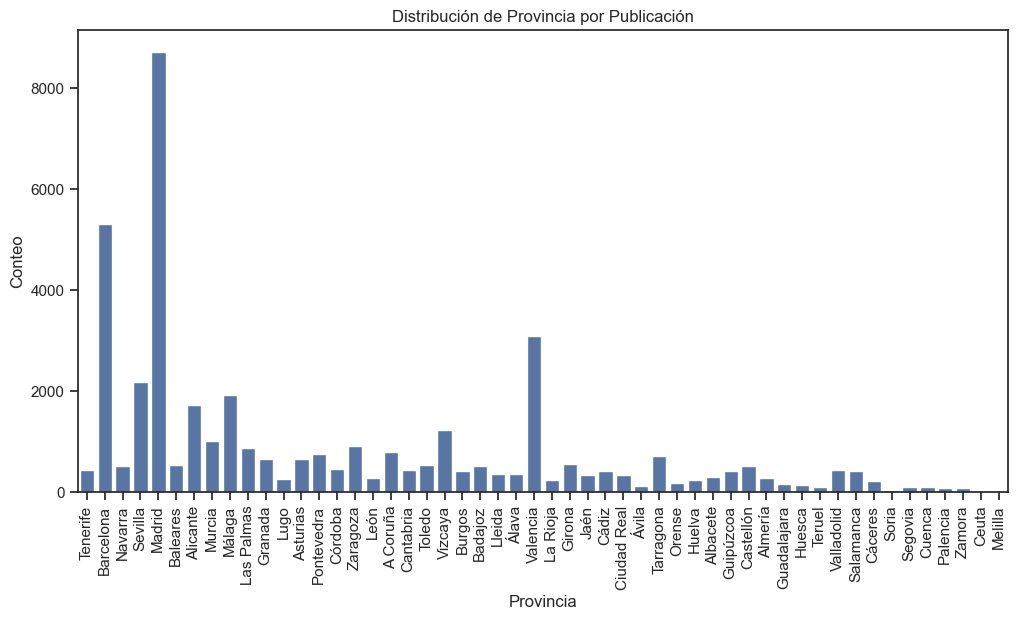

In [257]:

plt.figure(figsize=(12, 6))
sns.countplot(x="Province", data=data)
plt.title("Distribución de Provincia por Publicación")
plt.xlabel("Provincia")
plt.ylabel("Conteo")
plt.xticks(rotation=90);


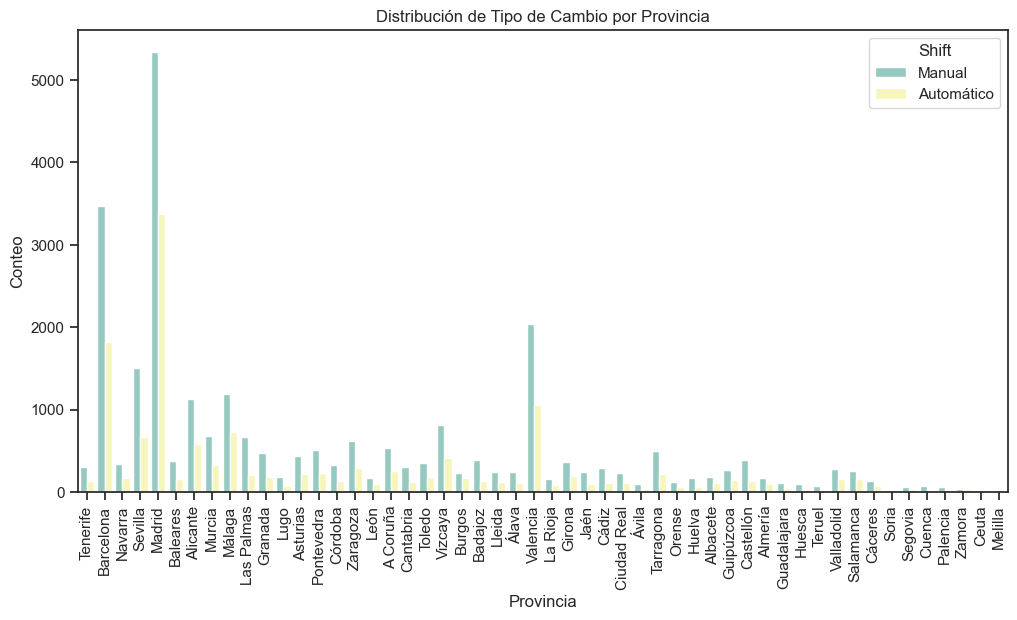

In [256]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Province", hue="Shift", data=data, palette="Set3")
plt.title("Distribución de Tipo de Cambio por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Conteo")
plt.xticks(rotation=90);


In [260]:
tabla_cruzada = pd.crosstab(data['Province'], data['Car brand'])


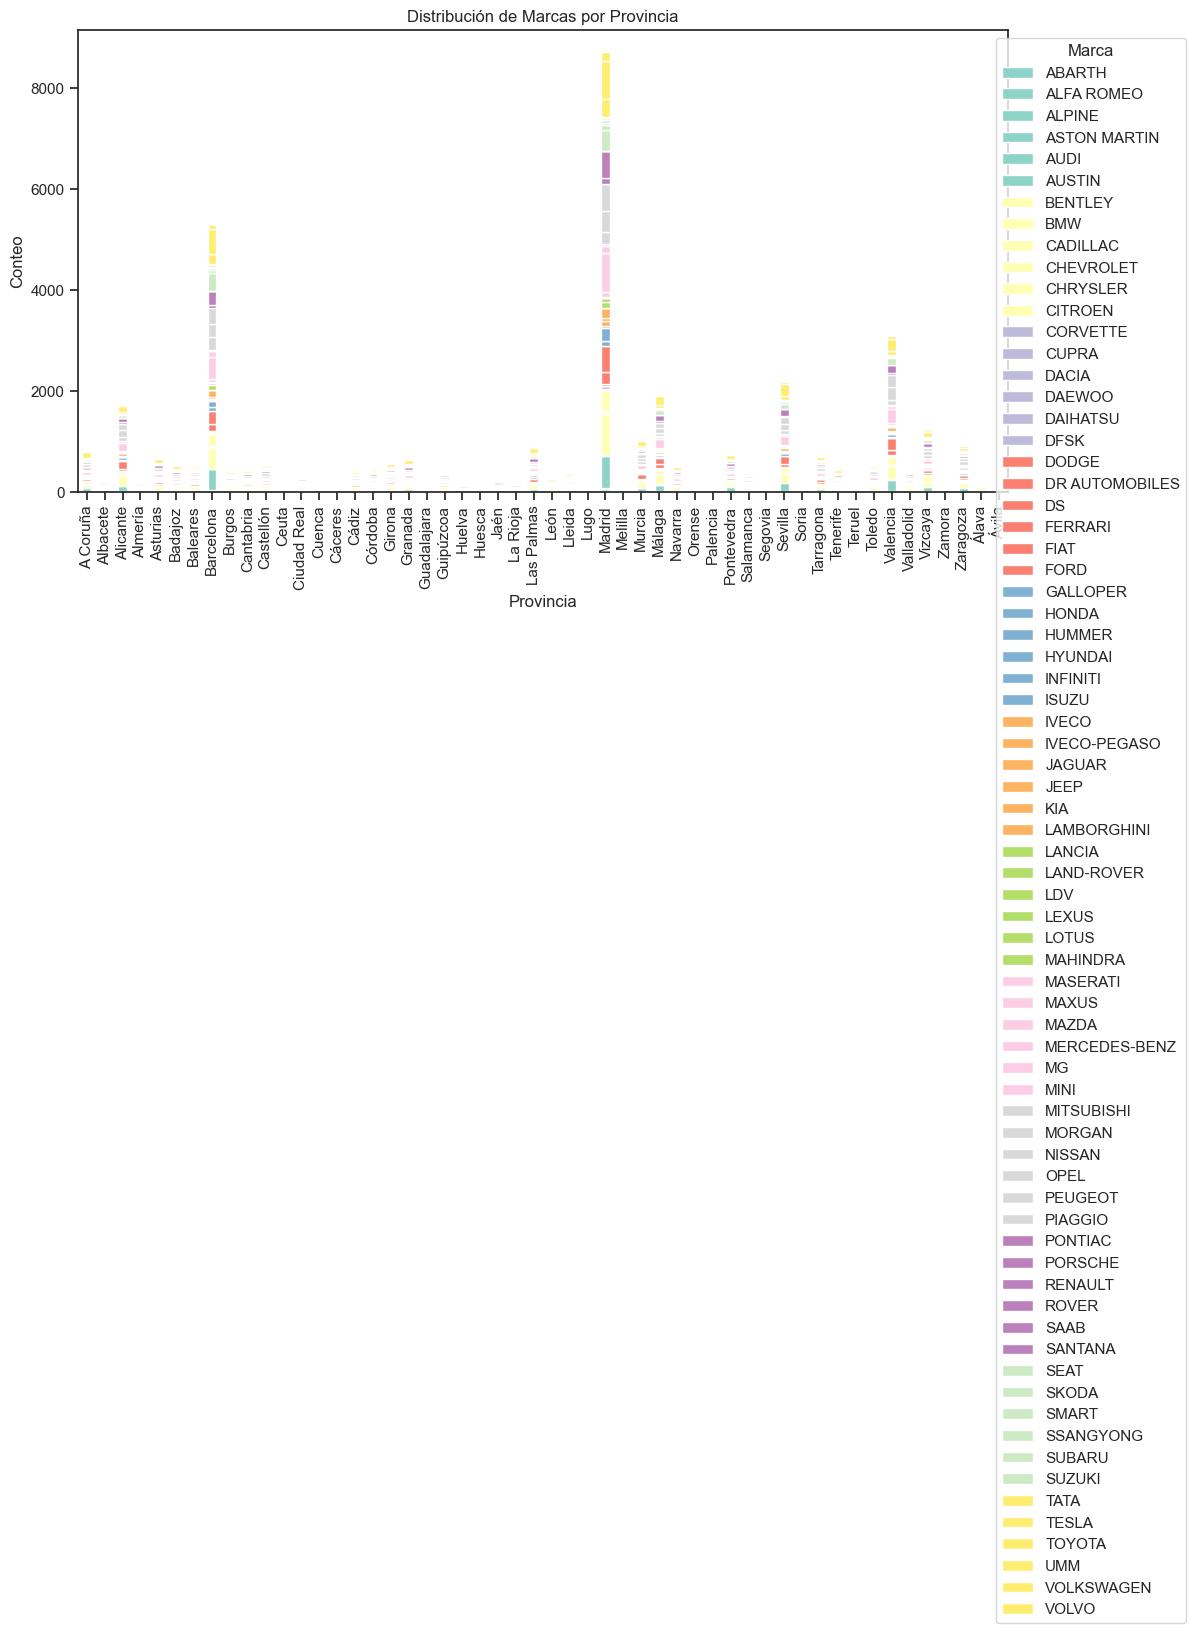

In [261]:

plt.figure(figsize=(12, 6))
tabla_cruzada.plot(kind='bar', stacked=True, cmap="Set3", ax=plt.gca())
plt.title("Distribución de Marcas por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Conteo")
plt.xticks(rotation=90)
plt.legend(title="Marca", loc="upper right", bbox_to_anchor=(1.2, 1));


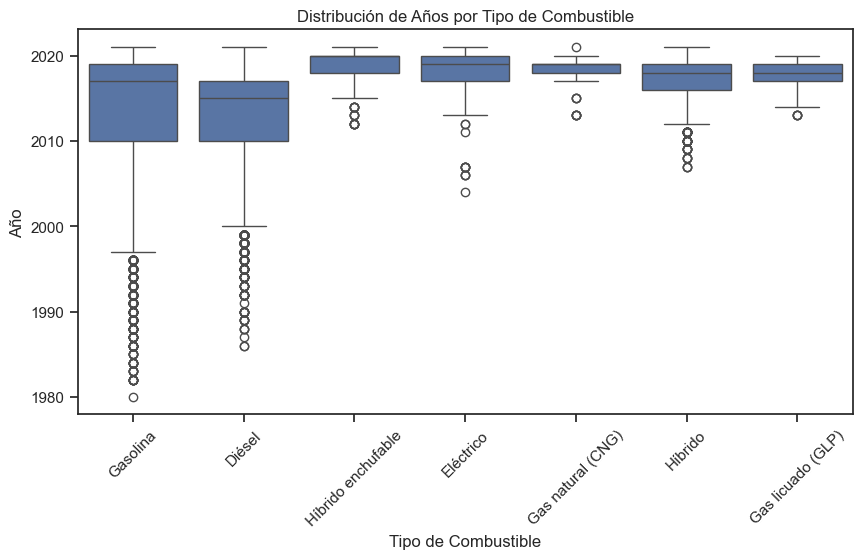

In [255]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='Fuel', y='Year')
plt.xlabel("Tipo de Combustible")
plt.ylabel("Año")
plt.title("Distribución de Años por Tipo de Combustible")
plt.xticks(rotation=45);


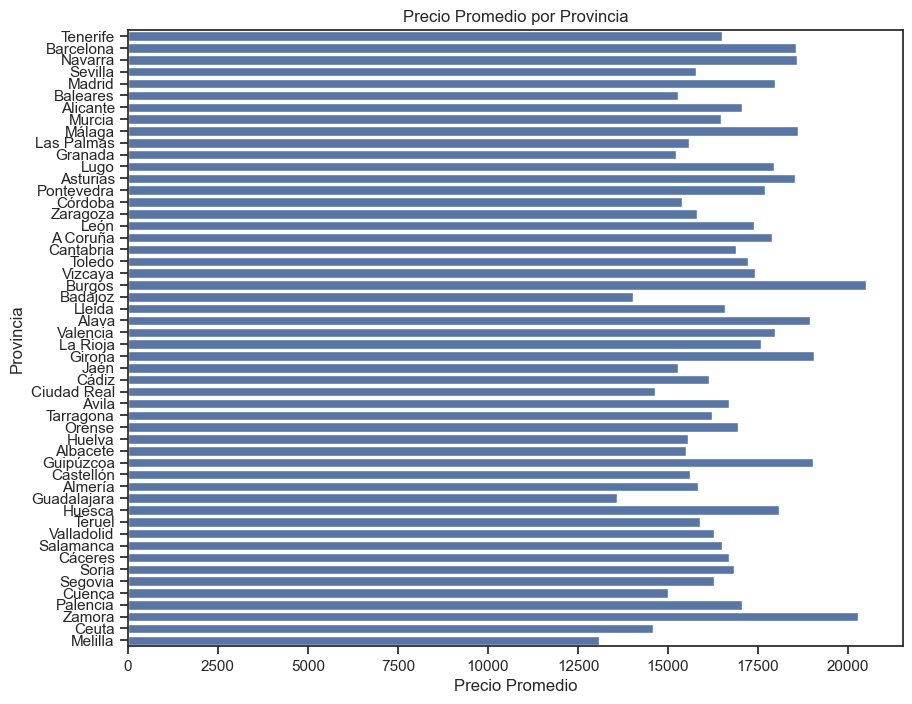

In [262]:

plt.figure(figsize=(10, 8))
sns.barplot(data=data, y='Province', x='Price')
plt.ylabel("Provincia")
plt.xlabel("Precio Promedio")
plt.title("Precio Promedio por Provincia");


**Análisis multivariante**: ver de manera gráfica la relación de todas con todas.

    20.1 Gráficas: heatmap de correlación, grid de gráficas mediante pairplot.

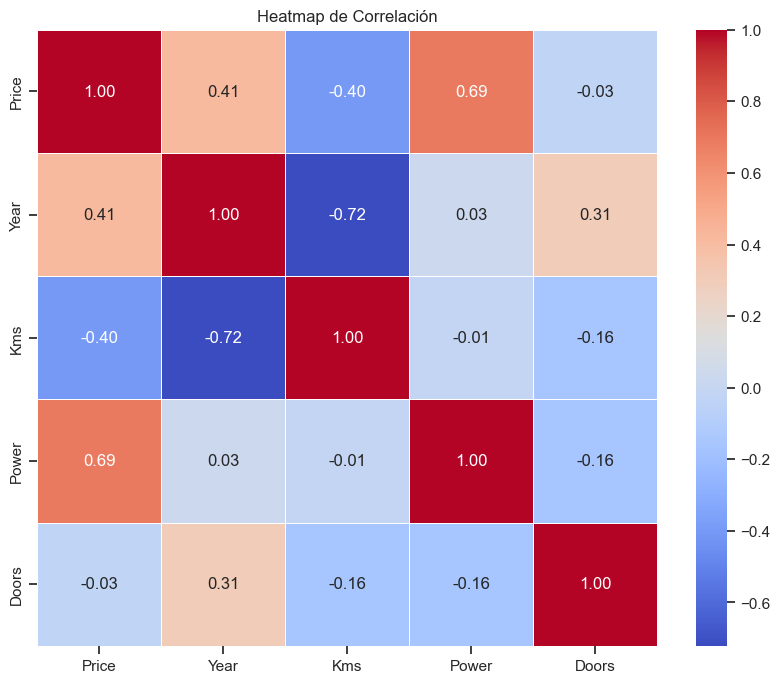

In [265]:

correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlación");


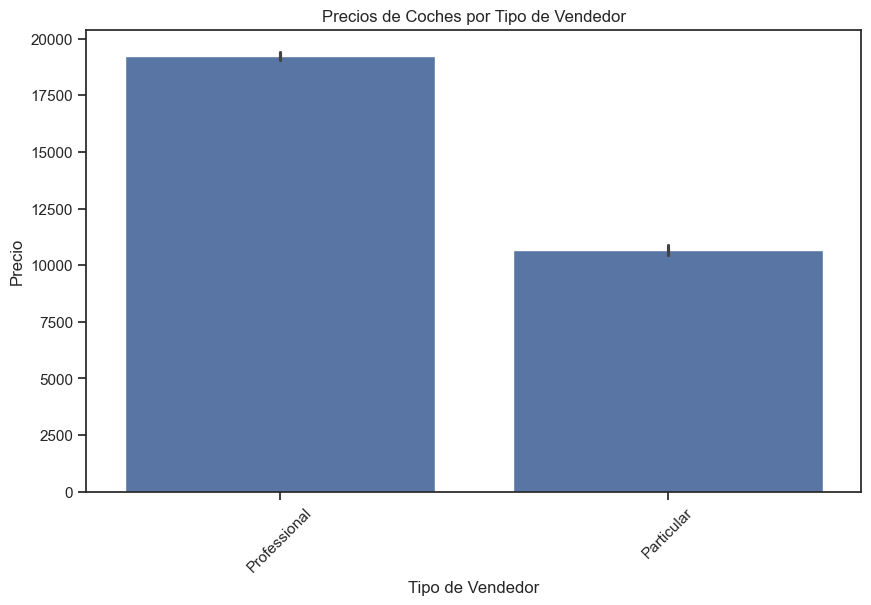

In [264]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Type of retailer', y='Price', data=data)
plt.xticks(rotation=45)
plt.xlabel('Tipo de Vendedor')
plt.ylabel('Precio')
plt.title('Precios de Coches por Tipo de Vendedor');

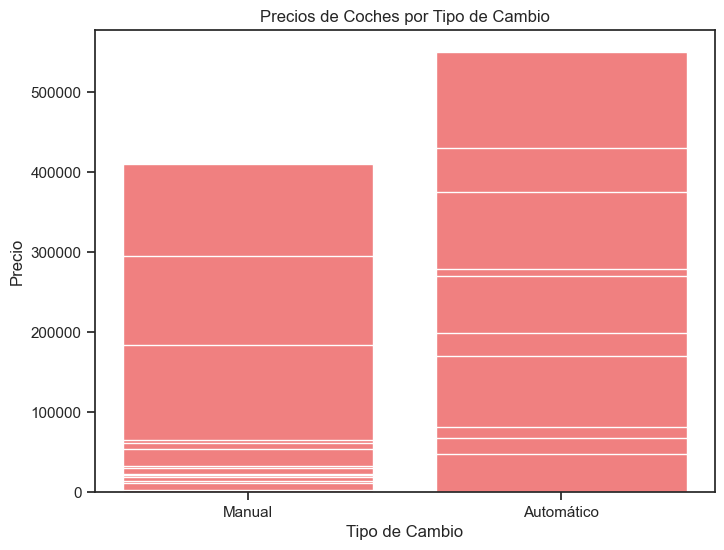

In [263]:
plt.figure(figsize=(8, 6))
plt.bar(data['Shift'], data['Price'], color='lightcoral')
plt.xlabel('Tipo de Cambio')
plt.ylabel('Precio')
plt.title('Precios de Coches por Tipo de Cambio');


In [219]:
df_final = data.to_csv("data/df_final.csv", index=False)